In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv(r"C:\Users\Lenovo\Desktop\Cloudy Data\Python\Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [5]:
print(dataframe.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


Text(0.5, 0, 'Type of restaurant')

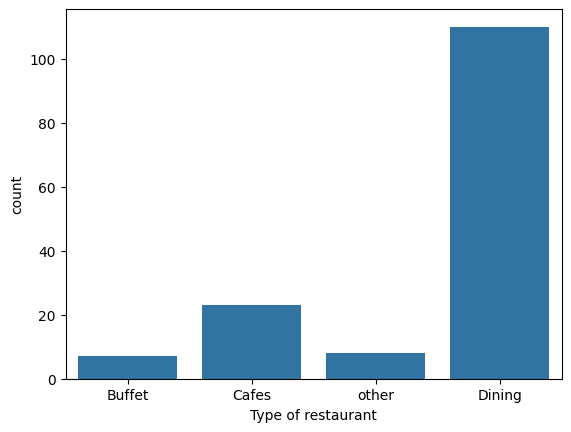

In [6]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

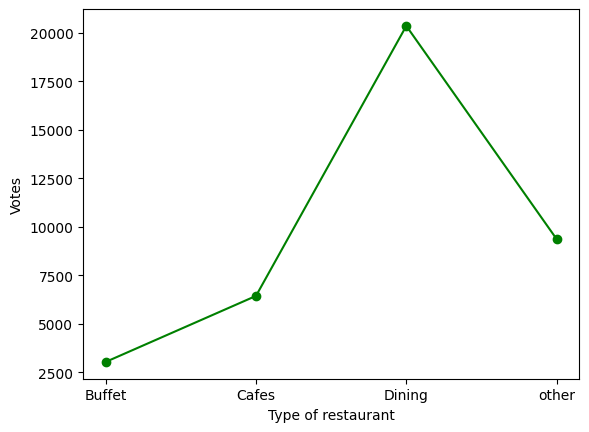

In [7]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

In [8]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9536\1994897672.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['online_order'],palette="Set3")


<Axes: xlabel='online_order', ylabel='count'>

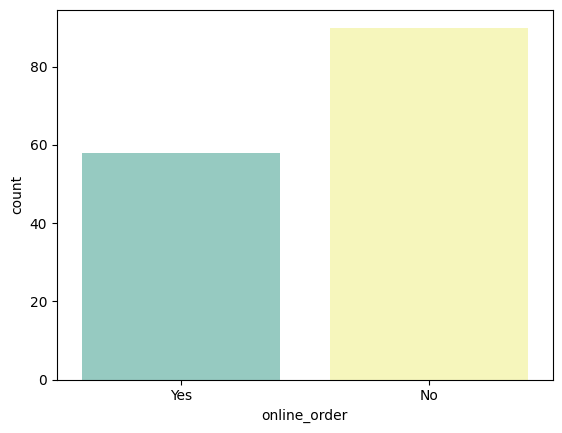

In [9]:
sns.countplot(x=dataframe['online_order'],palette="Set3")

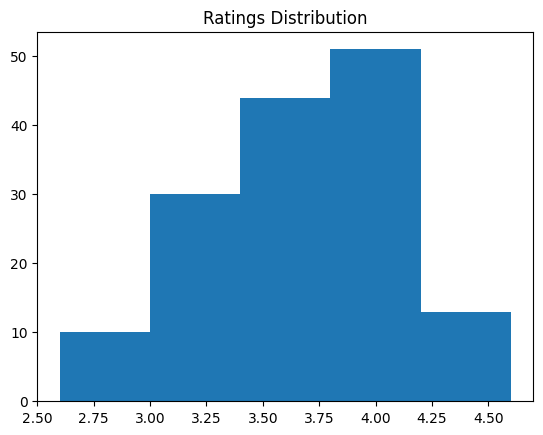

In [10]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9536\752043277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data,palette="Set2")


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

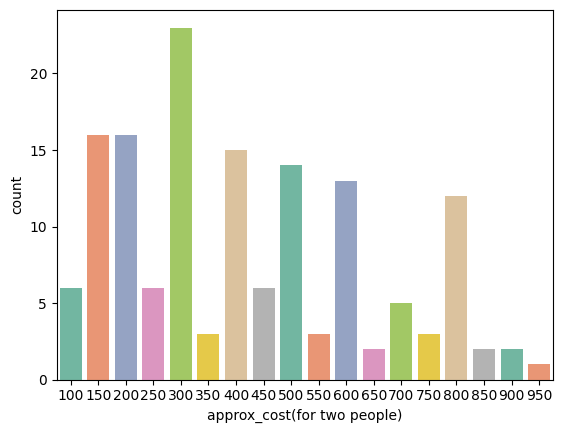

In [11]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data,palette="Set2")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9536\511452828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order', y = 'rate', data = dataframe, palette="Set2")


<Axes: xlabel='online_order', ylabel='rate'>

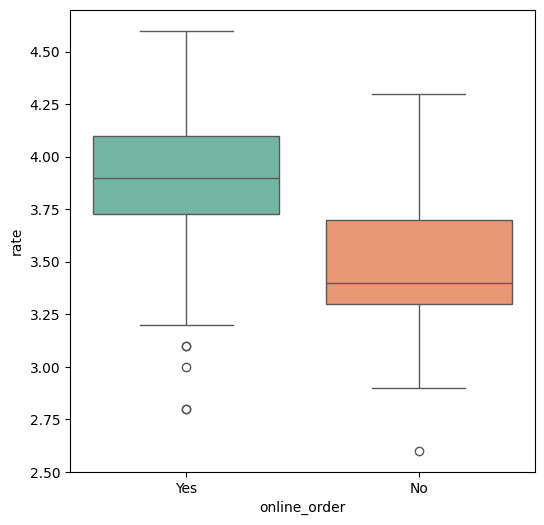

In [12]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe, palette="Set2")

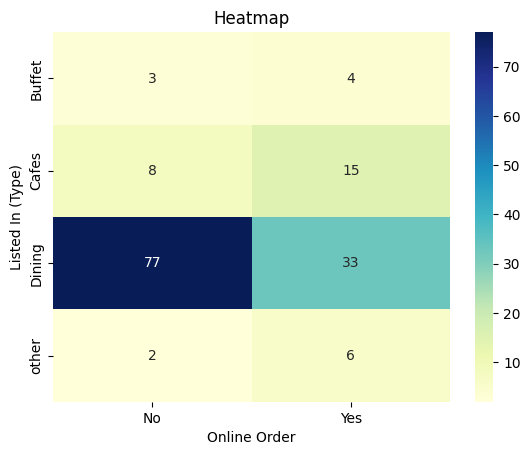

In [13]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

In [14]:
#1. How many restaurants provide online ordering and how many do not?

print(dataframe['online_order'].value_counts())


online_order
No     90
Yes    58
Name: count, dtype: int64


In [49]:
#2. How many restaurants provide both online ordering and table booking?

print(dataframe.groupby(['online_order', 'book_table']).size())

online_order  book_table
No            No            56
              Yes            1
Yes           No            51
              Yes            7
dtype: int64


In [47]:
#3. List the top 10 restaurants based on ratings.
top10 = dataframe[['name', 'rate','votes']].sort_values(by='rate',ascending=False).head(10)
print(top10)


                      name  rate  votes
7                   Onesta   4.6   2556
44                  Onesta   4.6   2556
38       Empire Restaurant   4.4   4884
86           Meghana Foods   4.4   4401
52  Corner House Ice Cream   4.3    345
11            Cafe Shuffle   4.2    150
34                  Faasos   4.2    415
37         Szechuan Dragon   4.2   1647
60           Peppy Peppers   4.2    244
9                Smacznego   4.2    504


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9536\3391733123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rate', y='name', data=top10, palette="viridis")


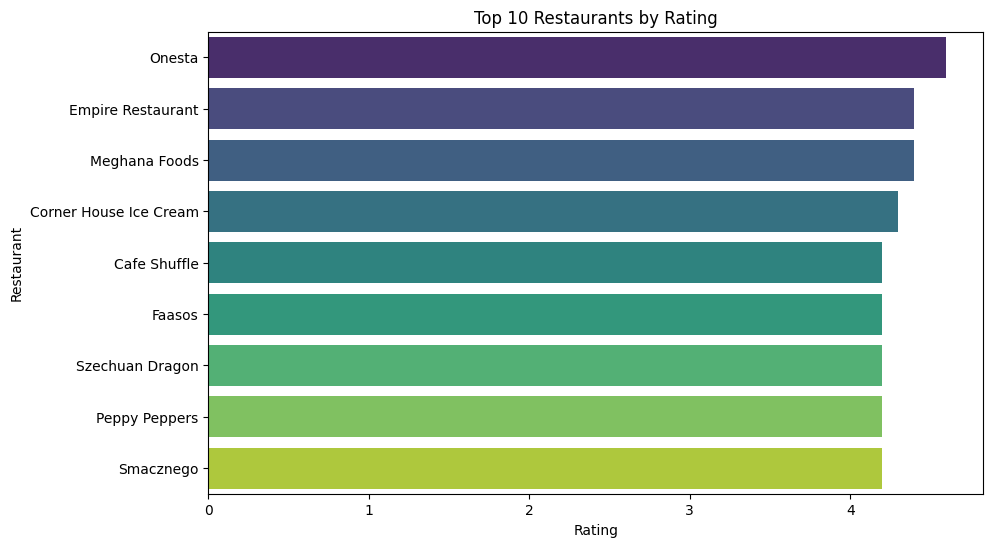

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x='rate', y='name', data=top10, palette="viridis")
plt.title("Top 10 Restaurants by Rating")
plt.xlabel("Rating")
plt.ylabel("Restaurant")
plt.show()

In [45]:
#4. List the bottom 10 restaurants based on ratings.
bottom10 = dataframe[['name', 'rate','votes']].sort_values(by='rate',ascending=True).head(10)
print(bottom10)


                                         name  rate  votes
94                            Nandhini Deluxe   2.6    283
31                                 Foodiction   2.8    506
36                             Fast And Fresh   2.8     91
73                                   LSD Cafe   2.9     84
124  Kwality Wall's Swirl's Happiness Station   2.9     25
146                                    Darbar   3.0     98
20                           The Vintage Cafe   3.0     62
19              360 Atoms Restaurant And Cafe   3.1     13
49                                Tasty Bytes   3.1    245
122                              Coffee Bytes   3.1      6


In [44]:
dataframe = dataframe[dataframe['votes'] > 0]

In [43]:
#5. Identify the top 50 budget-friendly restaurants that are also customer-friendly.
dataframe.rename(columns={'approx_cost(for two people)': 'cost'},inplace=True)
top50 = dataframe.sort_values(by=['cost', 'rate'], ascending=[True, False]).head(50)
print(top50[['name', 'cost', 'rate']])

                                            name  cost  rate
84                                     Chill Out   100   3.8
66                          Namma Brahmin's Idli   100   3.6
131                    Foodlieious Multi Cuisine   100   3.4
127                                Ruchi Maayaka   100   3.3
143                             Melting Melodies   100   3.3
122                                 Coffee Bytes   100   3.1
51                              Shree Cool Point   150   4.1
72                                 Spicy Tandoor   150   4.1
76   Sri Guru Kottureshwara Davangere Benne Dosa   150   4.1
39                  Maruthi Davangere Benne Dosa   150   4.0
62                               Chinese Kitchen   150   3.8
64                               Cake of the Day   150   3.7
113             Dharwad Line Bazaar Mishra Pedha   150   3.4
116                                   Wood Stove   150   3.4
117                                 Kulfi & More   150   3.4
129            Sri Basav

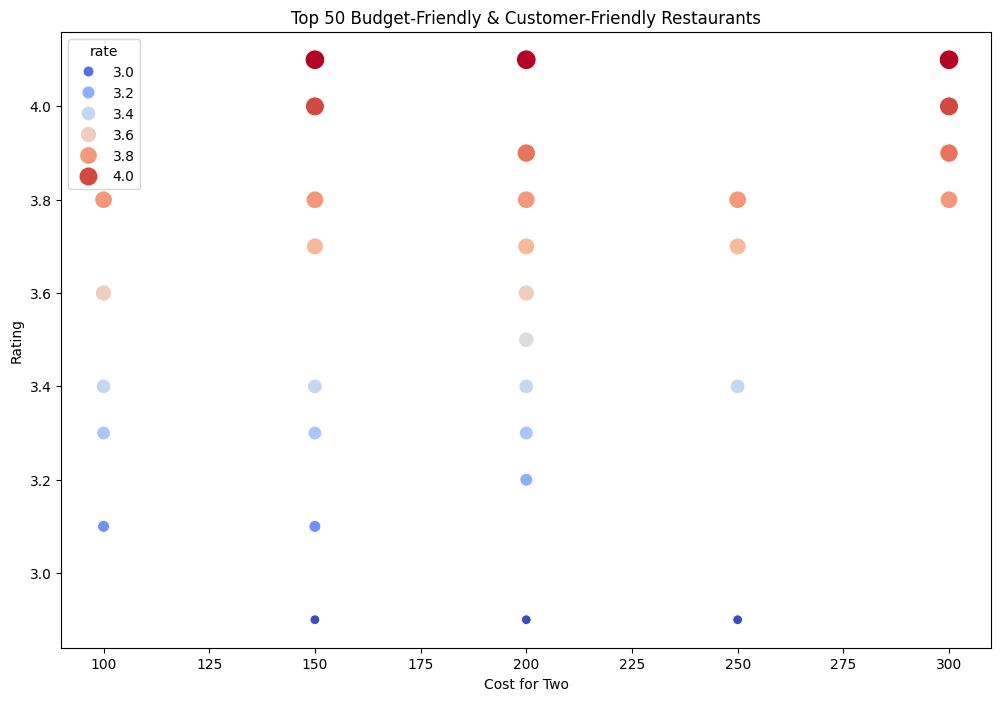

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='cost', y='rate', data=top50, hue='rate', size='rate', palette='coolwarm', sizes=(50,200))
plt.title("Top 50 Budget-Friendly & Customer-Friendly Restaurants")
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.show()

In [51]:
#6.Identify the top 20 budget-friendly restaurants by listed type that are also customer-friendly.
top20 = dataframe.sort_values(by=['cost', 'rate'], ascending=[True, False]).head(20)

print(top20[['name', 'listed_in(type)', 'cost', 'rate']])
top20_by_type = (
    dataframe.sort_values(by=['cost', 'rate'], ascending=[True, False])
    .groupby('listed_in(type)')
    .head(20)
)

print(top20_by_type[['name', 'listed_in(type)', 'cost', 'rate']])


                                            name listed_in(type)  cost  rate
66                          Namma Brahmin's Idli          Dining   100   3.6
127                                Ruchi Maayaka          Dining   100   3.3
122                                 Coffee Bytes          Dining   100   3.1
51                              Shree Cool Point          Dining   150   4.1
76   Sri Guru Kottureshwara Davangere Benne Dosa          Dining   150   4.1
39                  Maruthi Davangere Benne Dosa          Dining   150   4.0
62                               Chinese Kitchen          Dining   150   3.8
64                               Cake of the Day          Dining   150   3.7
111                   Atithi Point Ande Ka Funda          Dining   150   3.1
147                                Vijayalakshmi          Dining   200   3.9
26                                  Coffee Tindi           Cafes   200   3.8
40                                     Chaatimes          Dining   200   3.8

In [52]:
#How many restaurants are there in total?
print(len(dataframe))
dataframe.describe()

115


,rate,votes,cost
count,115.000000,115.000000,115.000000
mean,3.710435,340.800000,469.565217
std,0.394563,724.471885,220.415840
min,2.600000,4.000000,100.000000
25%,3.500000,28.000000,300.000000
50%,3.800000,88.000000,450.000000
75%,4.000000,311.500000,600.000000
max,4.600000,4884.000000,950.000000


In [39]:
#How many restaurants fall under each listed_in(type) category?
print(dataframe['listed_in(type)'].value_counts())

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9536\3507988258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='listed_in(type)', data=dataframe, order=dataframe['listed_in(type)'].value_counts().index, palette="Set2")


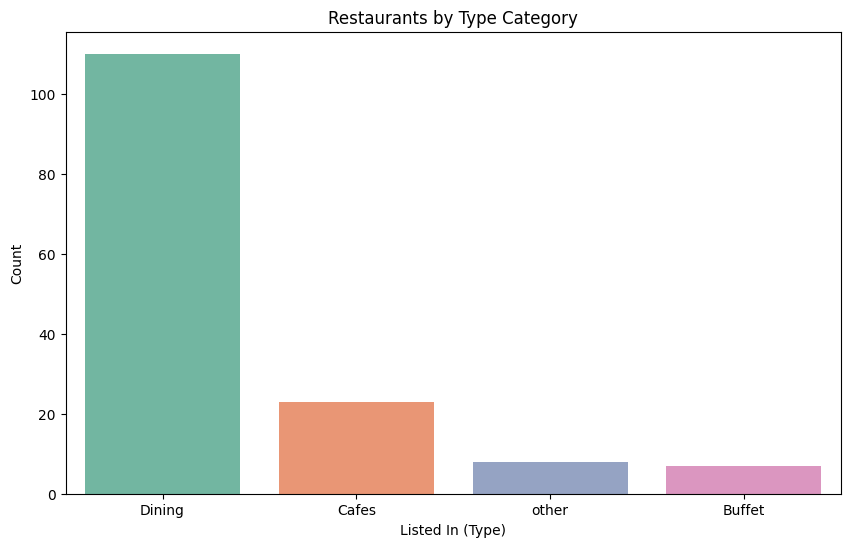

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='listed_in(type)', data=dataframe, order=dataframe['listed_in(type)'].value_counts().index, palette="Set2")
plt.title("Restaurants by Type Category")
plt.ylabel("Count")
plt.xlabel("Listed In (Type)")
plt.show()

In [36]:
#What is the average rating of restaurants that provide online ordering vs. those that do not?
avg_rating = dataframe.groupby('online_order')['rate'].mean().reset_index()
print(avg_rating)

  online_order      rate
0           No  3.487778
1          Yes  3.858621


In [35]:

#What is the average cost (for two) of restaurants that allow table booking vs. those that do not?
avg_cost = dataframe.groupby('book_table')['approx_cost(for two people)'].mean().reset_index()
print(avg_cost)

  book_table  approx_cost(for two people)
0         No                       402.50
1        Yes                       693.75


In [34]:
#Find the restaurant(s) with the highest number of votes.
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


In [33]:
#Find the restaurant(s) with the lowest rating but more than 200 votes.
lowest_rating = dataframe['rate'].min()
restaurant_with_lowest_rating = dataframe.loc[dataframe['rate'] == lowest_rating, 'name']

print('Restaurant(s) with the lowest rating:')
print(restaurant_with_lowest_rating)

Restaurant(s) with the lowest rating:
94    Nandhini Deluxe
Name: name, dtype: object


In [60]:
#List all restaurants where the cost is above the overall average cost.
avg_cost = dataframe['cost'].mean()
print(avg_cost)

469.5652173913044


In [61]:
above_avg = dataframe[dataframe['cost'] > avg_cost]
print("Restaurants with cost above average:")
print(above_avg[['name','cost', 'rate']])

Restaurants with cost above average:
                                                name  cost  rate
0                                              Jalsa   800   4.1
1                                     Spice Elephant   800   4.1
2                                    San Churro Cafe   800   3.8
4                                      Grand Village   600   3.8
5                                    Timepass Dinner   600   3.8
6    Rosewood International Hotel - Bar & Restaurant   800   3.6
7                                             Onesta   600   4.6
8                                     Penthouse Cafe   700   4.0
9                                          Smacznego   550   4.2
10                                      Village Café   500   4.1
11                                      Cafe Shuffle   600   4.2
12                                  The Coffee Shack   500   4.2
14                                   San Churro Cafe   800   3.8
15                                     Cafe Vivacity 

In [63]:
#Find the most common cost value (mode) among all restaurants.
most_common_cost = dataframe['cost'].mode()[0]
print("Most common cost value:", most_common_cost)


Most common cost value: 300


In [69]:
#Create a new column rating_value (extract numeric value from rate). Then, find the highest-rated restaurant under each listed_in(type).

dataframe['rating_value'] = (
    dataframe['rate']
    .astype(str) 
    .str.replace('/5', '')
    .astype(float)
)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9536\3804539574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rating_value'] = (


In [70]:
highest_rated = (
    dataframe.sort_values(['listed_in(type)', 'rating_value'], ascending=[True, False])
    .drop_duplicates('listed_in(type)')
)
print(highest_rated[['listed_in(type)', 'name', 'rating_value']])


   listed_in(type)           name  rating_value
0           Buffet          Jalsa           4.1
7            Cafes         Onesta           4.6
86          Dining  Meghana Foods           4.4
44           other         Onesta           4.6


In [72]:
#Find how many restaurants have a cost ≤500 and a rating ≥4.0.
filter_applied=dataframe[(dataframe['cost'] <= 500) & (dataframe['rating_value'] >= 4.0)]
print("Number of restaurants with cost ≤ 500 and rating ≥ 4.0:", len(filter_applied))

Number of restaurants with cost ≤ 500 and rating ≥ 4.0: 16


In [74]:
#Find the restaurant(s) where cost is highest but rating is still below 3.5.
max_cost_low_rate = dataframe.loc[dataframe['rating_value'] < 3.5, 'cost'].max()
result = dataframe[(dataframe['cost'] == max_cost_low_rate) & (dataframe['rating_value'] < 3.5)]

print(result[['name', 'cost', 'rating_value']])

              name  cost  rating_value
119  K27 - The Pub   900           3.1


In [57]:
#Group restaurants by online_order and calculate: average votes, average cost, and average rating.

online_order_group = dataframe.groupby('online_order').agg({
    'votes': 'mean',
    'approx_cost(for two people)': 'mean',
    'rating_value': 'mean'
}).reset_index()
online_order_group.columns = ['Online Order', 'Average Votes', 'Average Cost', 'Average Rating']

print(online_order_group)


  Online Order  Average Votes  Average Cost  Average Rating
0           No      75.222222    358.888889        3.487778
1          Yes     559.000000    510.344828        3.858621


In [17]:
#Group restaurants by book_table and calculate the total number of votes.

book_table_group = dataframe.groupby('book_table')['votes'].sum().reset_index()
book_table_group.columns = ['Book Table', 'Total Votes']

print(book_table_group)

  Book Table  Total Votes
0         No        31666
1        Yes         7526


In [20]:
#Find the ratio of restaurants that allow both online_order and book_table to total restaurants.
total_restaurants = len(dataframe)
print(total_restaurants)

148


In [24]:
both = len(dataframe[(dataframe['online_order'] == 'Yes') & (dataframe['book_table'] == 'Yes')])
ratio= both/total_restaurants
print(ratio)

0.0472972972972973


In [75]:
#Find restaurants where votes are in the top 10% but rating_value is below 4.0.
top_n = int(len(dataframe) * 0.10) 
top_votes = dataframe.nlargest(top_n, 'votes')
top_votes_low_rating = top_votes[top_votes['rating_value'] < 4.0]

print(top_votes_low_rating[['name', 'votes', 'rating_value']])


               name  votes  rating_value
2   San Churro Cafe    918           3.8
14  San Churro Cafe    918           3.8


In [80]:
#Add a column budget_category with: “Low” (≤500), “Medium” (501–800), “High” (>800). Count restaurants in each category.def categorize_budget(cost):
def categorize_budget(cost):
    if cost <= 500:
        return "Low"
    elif cost <= 800:
        return "Medium"
    else:
        return "High"

dataframe['Budget_category'] = dataframe['cost'].apply(categorize_budget)
category_counts = dataframe['Budget_category'].value_counts()
print(category_counts)


Budget_category
Low       72
Medium    38
High       5
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9536\600322223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Budget_category'] = dataframe['cost'].apply(categorize_budget)


In [85]:
#Find the cheapest restaurant in each listed_in(type) category.
cheapest = dataframe.loc[dataframe.groupby('listed_in(type)')['cost'].idxmin(),['listed_in(type)', 'name', 'cost', 'rating_value']]
print(cheapest)


   listed_in(type)                   name  cost  rating_value
3           Buffet  Addhuri Udupi Bhojana   300           3.7
26           Cafes           Coffee Tindi   200           3.8
66          Dining   Namma Brahmin's Idli   100           3.6
31           other             Foodiction   500           2.8


In [88]:
#Find restaurants that have duplicate approx_cost(for two people) but different ratings.
rating_counts = dataframe.groupby('cost')['rating_value'].nunique().reset_index()
duplicate_costs = rating_counts[rating_counts['rating_value'] > 1]['cost']
restaurants_diff_ratings = dataframe[dataframe['cost'].isin(duplicate_costs)]
print(restaurants_diff_ratings[['name', 'cost', 'rating_value']])

                                         name  cost  rating_value
0                                       Jalsa   800           4.1
1                              Spice Elephant   800           4.1
2                             San Churro Cafe   800           3.8
3                       Addhuri Udupi Bhojana   300           3.7
4                               Grand Village   600           3.8
..                                        ...   ...           ...
124  Kwality Wall's Swirl's Happiness Station   200           2.9
127                             Ruchi Maayaka   100           3.3
145                              Anna Kuteera   450           4.0
146                                    Darbar   800           3.0
147                             Vijayalakshmi   200           3.9

[113 rows x 3 columns]


In [89]:
#Which restaurants have identical votes but different ratings?
merged = dataframe.merge(dataframe, on='votes')
diff_ratings = merged[(merged['rating_value_x'] != merged['rating_value_y']) & (merged['name_x'] != merged['name_y'])]
diff_ratings = diff_ratings[['name_x', 'votes', 'rating_value_x', 'name_y', 'rating_value_y']].drop_duplicates()
print(diff_ratings)


                                              name_x  votes  rating_value_x  \
7                                    Timepass Dinner    286             3.8   
9    Rosewood International Hotel - Bar & Restaurant      8             3.6   
10   Rosewood International Hotel - Bar & Restaurant      8             3.6   
11   Rosewood International Hotel - Bar & Restaurant      8             3.6   
24                                      Catch-up-ino    133             3.9   
28                     360 Atoms Restaurant And Cafe     13             3.1   
30                                  The Vintage Cafe     62             3.0   
31                                  The Vintage Cafe     62             3.0   
34                                   Cafe Coffee Day     28             3.6   
35                                   Cafe Coffee Day     28             3.6   
37                                      My Tea House     62             3.6   
39                                      My Tea House

In [90]:
#Calculate the correlation between votes and rating_value
correlation = dataframe['votes'].corr(dataframe['rating_value'])
print("Correlation between votes and rating_value:", correlation)


Correlation between votes and rating_value: 0.48805095954849936


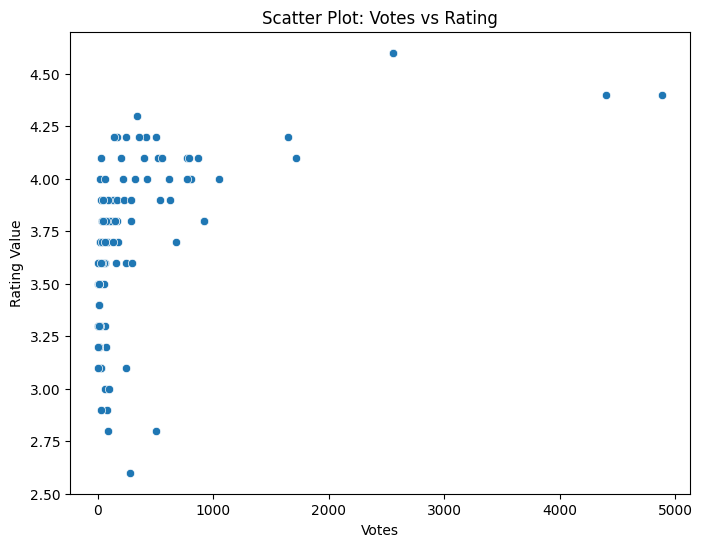

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=dataframe, x='votes', y='rating_value')
plt.title("Scatter Plot: Votes vs Rating")
plt.xlabel("Votes")
plt.ylabel("Rating Value")
plt.show()


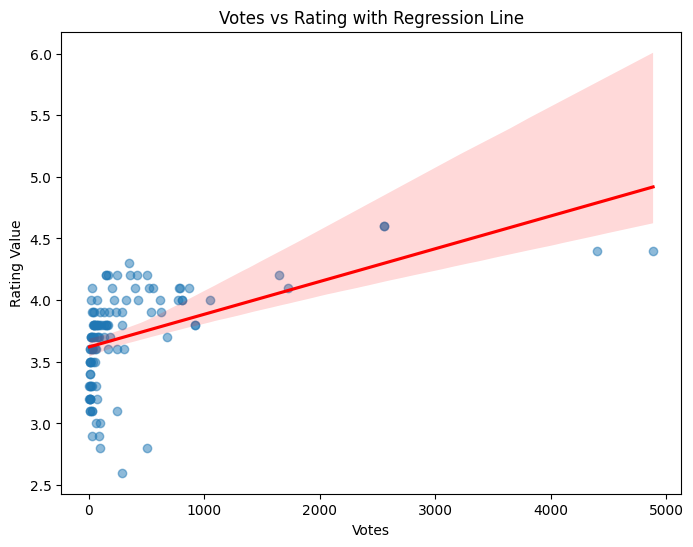

In [92]:
plt.figure(figsize=(8,6))
sns.regplot(data=dataframe, x='votes', y='rating_value', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Votes vs Rating with Regression Line")
plt.xlabel("Votes")
plt.ylabel("Rating Value")
plt.show()
